# Task 1: Iris Flowers Classification
## By: Parimi Manasa
## Beginner Level Task

## Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Reading the data from dataset

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Checking for Null Values

In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


## Check the datatypes of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Describe the dataset

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Count the values of Species

In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Exploratory Data Analysis

## Pairplot

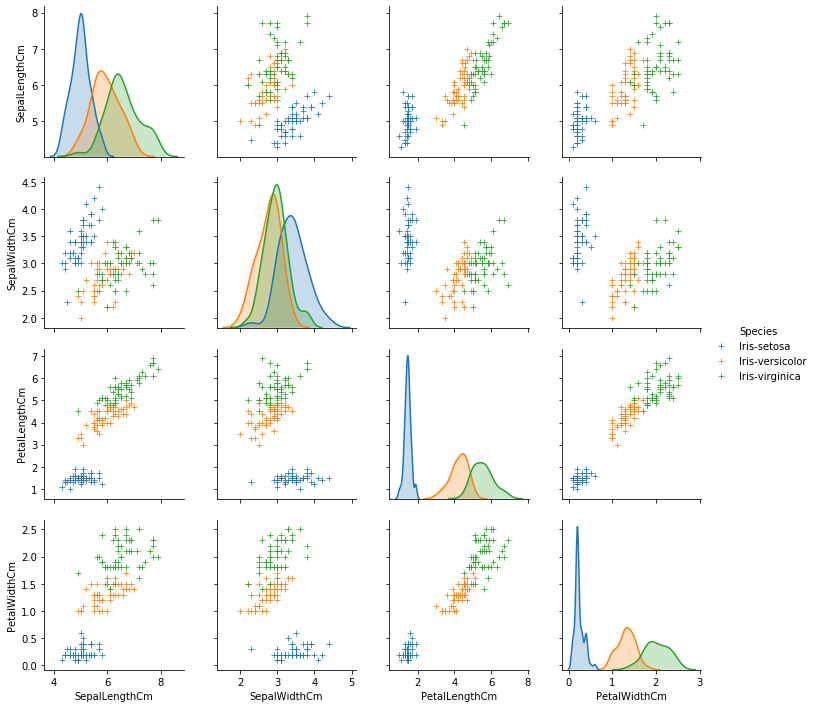

In [9]:
tmp = df.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

## Violinplot

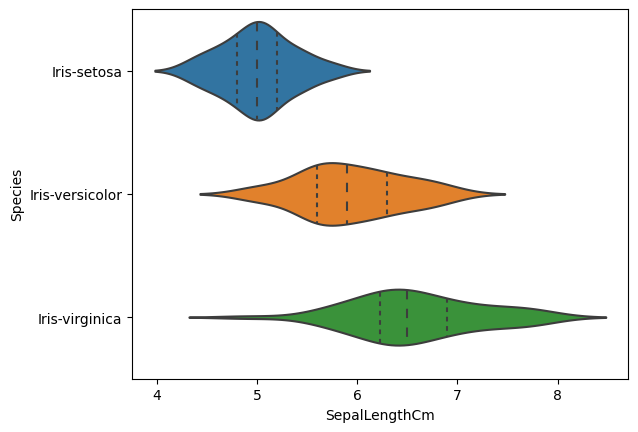

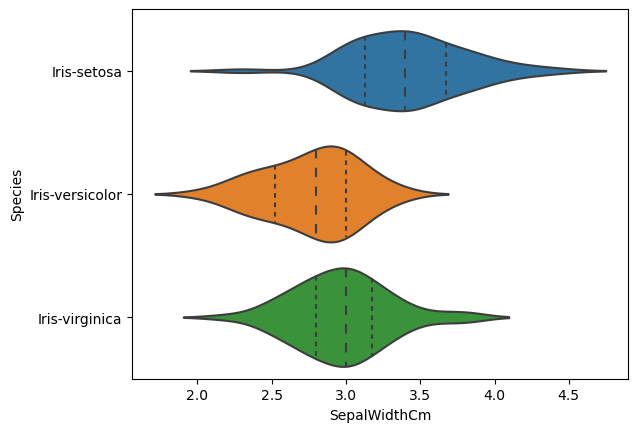

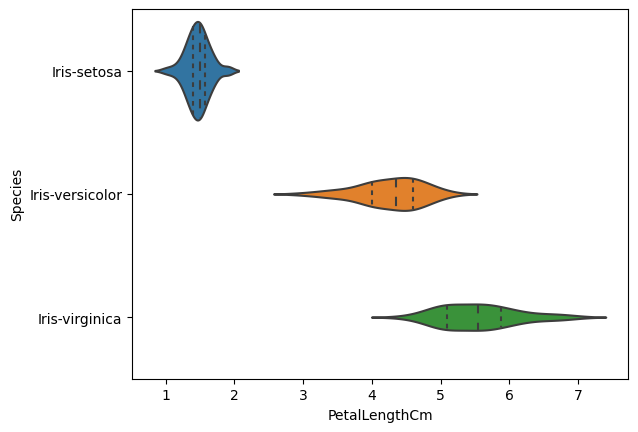

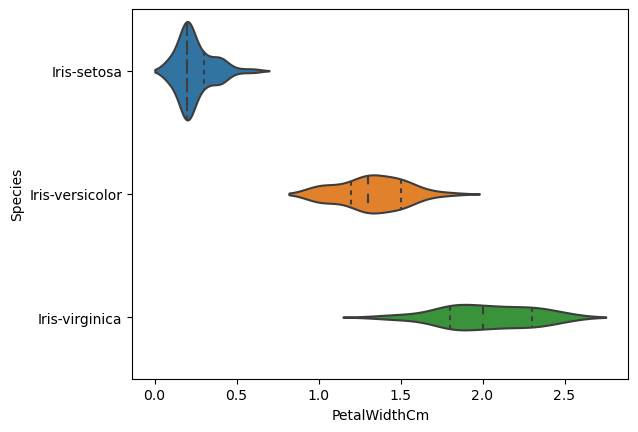

In [10]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

## Correlation Matrix

<Axes: >

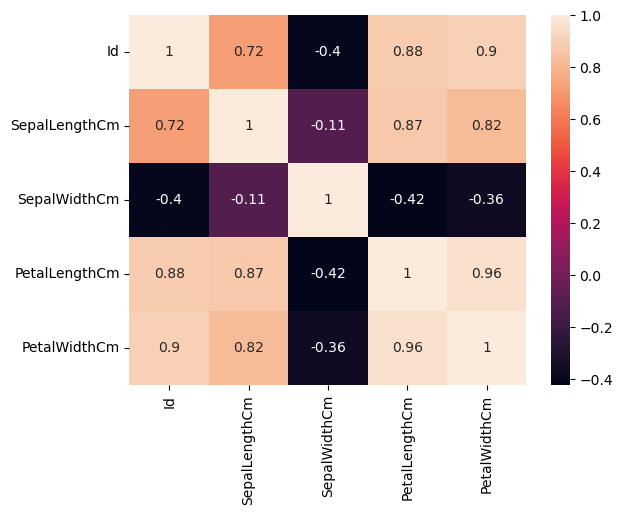

In [17]:
var=df.corr(numeric_only=True).round(2)
sns.heatmap(data=var,annot=True)

## Split  the dataset into Training set and Testing set

In [19]:
x=df.drop(['Id', 'Species'], axis=1)
y=df['Species']
print(x.head())
print(x.shape)
print(y.head())
print(y.shape)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
(150, 4)
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object
(150,)


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.4,random_state=3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


# Model Selection and Evaluation

## KNN Model

In [31]:
k_range = list(range(1,12))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
print("Accuracy Scores K-Nearest-Neighbors:",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Scores K-Nearest-Neighbors: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.94      0.85      0.89        20
 Iris-virginica       0.85      0.94      0.89        18

       accuracy                           0.93        60
      macro avg       0.93      0.93      0.93        60
   weighted avg       0.94      0.93      0.93        60



## Logistic Regression

In [37]:
L=LogisticRegression(solver='lbfgs',max_iter=300)
L.fit(x_train,y_train)
y_pred = L.predict(x_test)
print("Accuracy Scores of LogisticRegression:",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Scores of LogisticRegression: 0.95
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      0.85      0.92        20
 Iris-virginica       0.86      1.00      0.92        18

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.96      0.95      0.95        60



## Support Vector Machine

In [43]:
S=SVC()
S.fit(x_train, y_train)
y_pred=S.predict(x_test)
print("Accuracy Scores of SVM:",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Scores of SVM: 0.95
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.95      0.90      0.92        20
 Iris-virginica       0.89      0.94      0.92        18

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60



## DecisionTreeClassifier

In [48]:
D=DecisionTreeClassifier()
D.fit(x_train, y_train)
y_pred=D.predict(x_test)
print("Accuracy Scores of decisiontreeclassification:",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Scores of decisiontreeclassification: 0.95
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      0.85      0.92        20
 Iris-virginica       0.86      1.00      0.92        18

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.96      0.95      0.95        60



## Random Forest Classifier

In [46]:
R=RandomForestClassifier()
R.fit(x_train, y_train)
y_pred=R.predict(x_test)
print("Accuracy Scores of randomforestclassification:",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Scores of randomforestclassification: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      0.90      0.95        20
 Iris-virginica       0.90      1.00      0.95        18

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.96        60
   weighted avg       0.97      0.97      0.97        60



## Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
G=GaussianNB()
G.fit(x_train,y_train)
y_pred=G.predict(x_test)
print("Accuracy Scores of Naivebayes:",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Scores of Naivebayes: 0.9833333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.95      1.00      0.97        18

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



### The most accurate model from the following selection and evaluation is NAIVE BAYES model with 98% accuracy